In [15]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

def get_data(file): 
    """
    Fetch data from disk
    """
    data = pd.read_csv(file + '.csv', index_col='Date', parse_dates=['Date'])
    return data 
    

def calc_corr(ser1, ser2, window):
    """
    Calculates correlation between two series.
    """
    ret1 = ser1.pct_change()
    ret2 = ser2.pct_change()
    corr = ret1.rolling(window).corr(ret2)
    return corr

# Define how many points we intend to plot. Points in this case would be trading days.
points_to_plot = 300

# Go get the log return data.
data = get_data('indexes')

# Rebase the two series to the same point in time, starting where the plot will start.
for ind in data:
    data[ind + '_rebased'] = (data[-points_to_plot:][ind].pct_change() + 1).cumprod()

# Relative strength, NDX to SP500
data['rel_str'] = data['NDX'] / data['SP500']

# Calculate 50 day rolling correlation
data['corr'] = calc_corr(data['NDX'], data['SP500'], 100)

print("Correlation and relative strength have been calculated.")


Correlation and relative strength have been calculated.


In [17]:
# You could use this copy the DataFrame to clipboard, 
# which could easily be pasted into Excel or similar
# for inspection.
data.to_clipboard()

In [16]:
# We can take a look at the data in the DataFrame
# Using head or tail to print from the start or the bottom.
data.tail(20)

,SP500,NDX,SP500_rebased,NDX_rebased,rel_str,corr
Date,,,,,,
2018-07-06,2759.82,7207.334,1.142749,1.247294,2.611523,0.943911
2018-07-09,2784.17,7276.001,1.152832,1.259178,2.613347,0.944012
2018-07-10,2793.84,7282.599,1.156836,1.260320,2.606663,0.942303
2018-07-11,2774.02,7243.980,1.148629,1.253636,2.611365,0.941116
2018-07-12,2798.29,7366.250,1.158679,1.274796,2.632411,0.941777
2018-07-13,2801.31,7375.817,1.159929,1.276452,2.632988,0.944167
2018-07-16,2798.43,7357.899,1.158737,1.273351,2.629295,0.944487
2018-07-17,2809.55,7403.891,1.163341,1.281310,2.635259,0.944631
2018-07-18,2815.62,7390.126,1.165854,1.278928,2.624689,0.942287


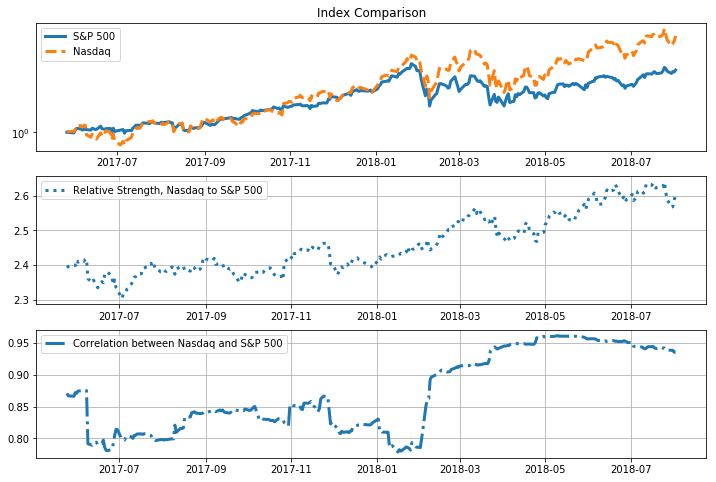

In [18]:

#After this, we slice the data, effectively discarding all but the last 300 data points, using the slicing logic from before.
# Slice the data, cut points we don't intend to plot.
plot_data = data[-points_to_plot:]

# Make  new figure and set the size.
fig = plt.figure(figsize=(12, 8))

# The first subplot, planning for 3 plots high, 1 plot wide, this being the first.
ax = fig.add_subplot(311)
ax.set_title('Index Comparison')
ax.semilogy(plot_data['SP500_rebased'], linestyle='-', label='S&P 500', linewidth=3.0)
ax.semilogy(plot_data['NDX_rebased'], linestyle='--', label='Nasdaq', linewidth=3.0)
ax.legend()
ax.grid(False)

# Second sub plot.
ax = fig.add_subplot(312)
ax.plot(plot_data['rel_str'], label='Relative Strength, Nasdaq to S&P 500', linestyle=':', linewidth=3.0)
ax.legend()
ax.grid(True)

# Third subplot.
ax = fig.add_subplot(313)
ax.plot(plot_data['corr'], label='Correlation between Nasdaq and S&P 500', linestyle='-.', linewidth=3.0)
ax.legend()
ax.grid(True)